# **Project Name**    - DeepFER: Facial Emotion Recognition Using Deep Learning



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mritunjay Mishra


# **Project Summary -**

DeepFER: Facial Emotion Recognition Using Deep Learning is a deep learning-based system designed to recognize human emotions from facial expressions in real-time. The project leverages Convolutional Neural Networks (CNNs) and Transfer Learning to classify images into seven emotion categories: Angry, Sad, Happy, Fear, Neutral, Disgust, and Surprise.

With growing interest in emotion-aware systems, this project aims to bridge the gap between human emotions and machine understanding. It uses a diverse and well-annotated dataset of facial images, incorporating both posed and spontaneous expressions. To improve model generalization and robustness, various data augmentation techniques like rotation, flipping, and zooming are applied during preprocessing.

The model architecture is carefully designed and fine-tuned using state-of-the-art deep learning techniques, and optimized for real-time emotion detection. The ultimate goal of DeepFER is to enable practical applications in domains like mental health monitoring, customer service feedback systems, and human-computer interaction, where recognizing human emotions can significantly enhance user experience and responsiveness.

# **GitHub Link -**

https://github.com/Jay-mishra04/Facial-Emotion-Recognition-Using-Deep-Learning.git

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Import Libraries
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

### Dataset Loading

In [9]:
# Load Dataset
base_dataset_path = 'original_images'

train_data_dir = os.path.join(base_dataset_path, 'train')
validation_data_dir = os.path.join(base_dataset_path, 'validation')

In [10]:
print(train_data_dir)
print(validation_data_dir)

original_images/train
original_images/validation


### Dataset First View

#### Viewing images from Training Images Folder

5 random Images in the happy folder out of 7164 total files


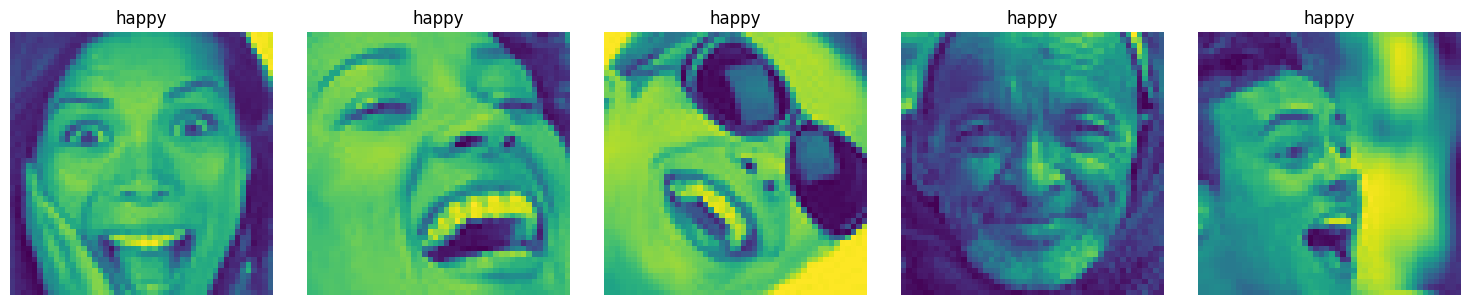

****************************************************************************************************
5 random Images in the surprise folder out of 3205 total files


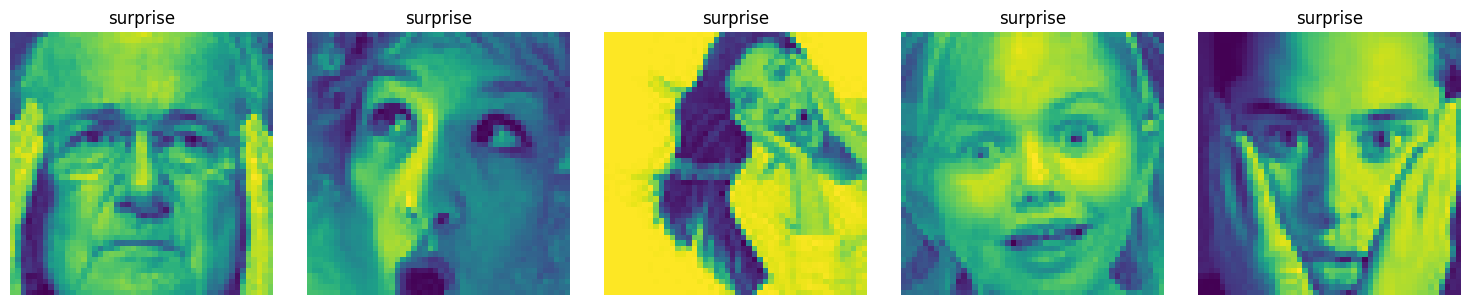

****************************************************************************************************
5 random Images in the neutral folder out of 4982 total files


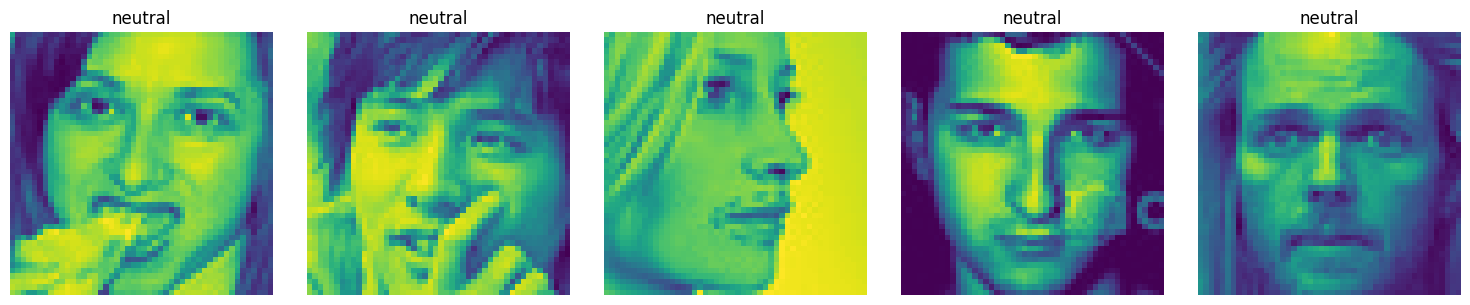

****************************************************************************************************
5 random Images in the fear folder out of 4103 total files


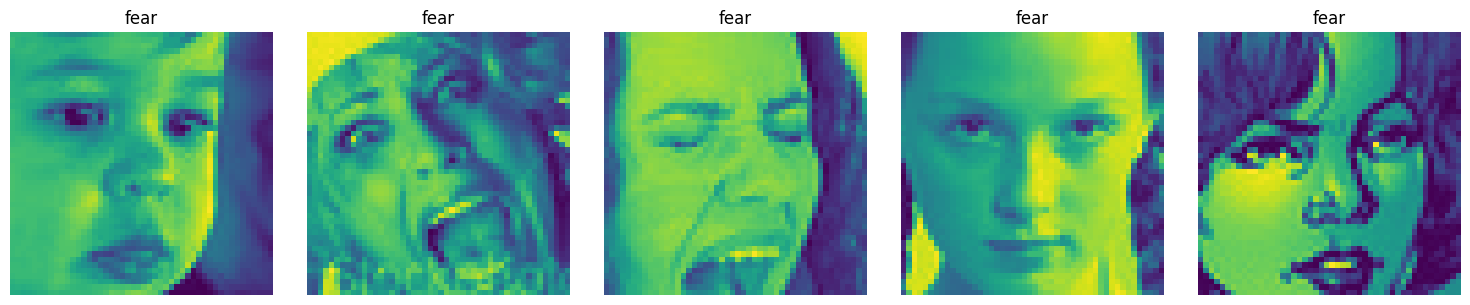

****************************************************************************************************
5 random Images in the disgust folder out of 436 total files


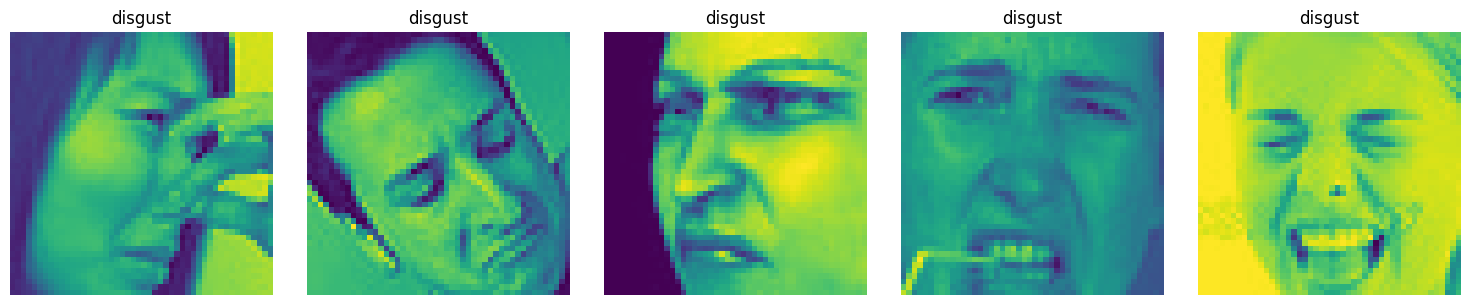

****************************************************************************************************
5 random Images in the sad folder out of 4938 total files


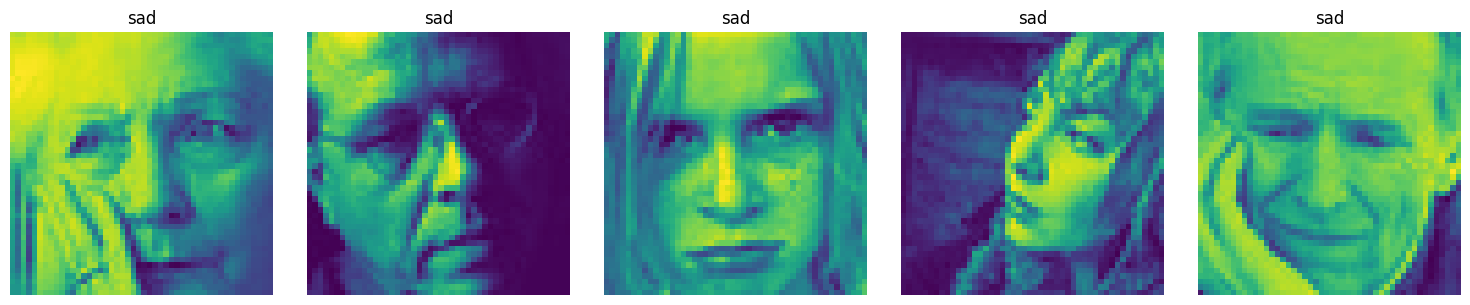

****************************************************************************************************
5 random Images in the angry folder out of 3993 total files


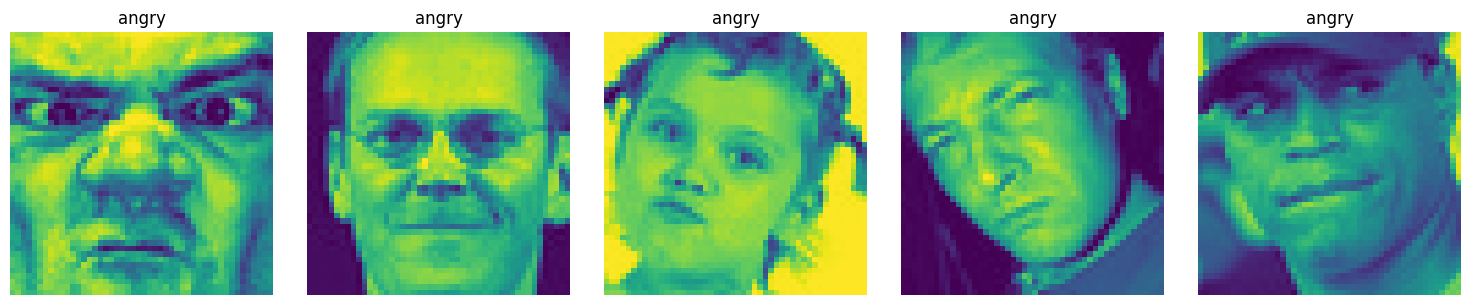

****************************************************************************************************


In [11]:
# Dataset First Look
train_path = 'original_images/train'
train_classes = os.listdir(train_path)

for class_name in train_classes:
    class_dir = os.path.join(train_path, class_name)
    images_files = os.listdir(class_dir)

    print(f"5 random Images in the {class_name} folder out of {len(images_files)} total files")

    random_images = random.sample(images_files, min(5, len(images_files)))

    plt.figure(figsize = (15, 3))
    for index, images in enumerate(random_images):
        img_path = os.path.join(class_dir, images)
        img = Image.open(img_path)
        
        plt.subplot(1, 5, index+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("*"*100)

#### Viewing images from Validation Images Folder

5 random Images in the happy folder out of 1825 total files


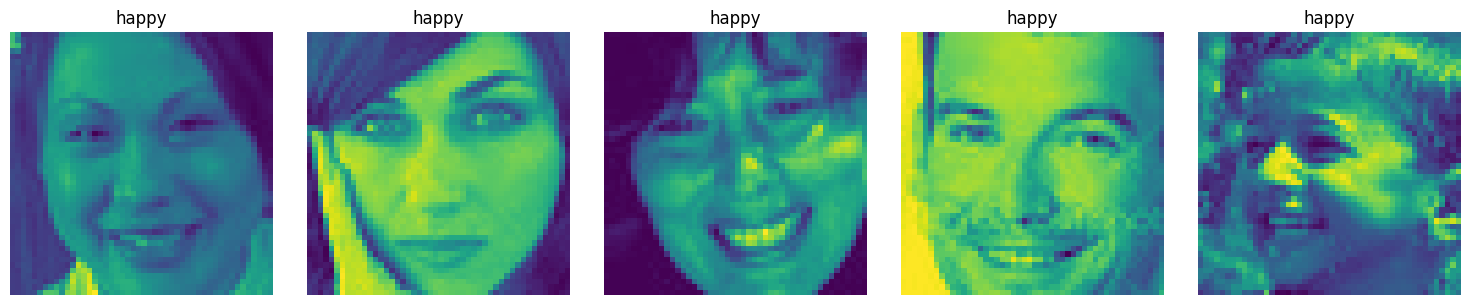

****************************************************************************************************
5 random Images in the surprise folder out of 797 total files


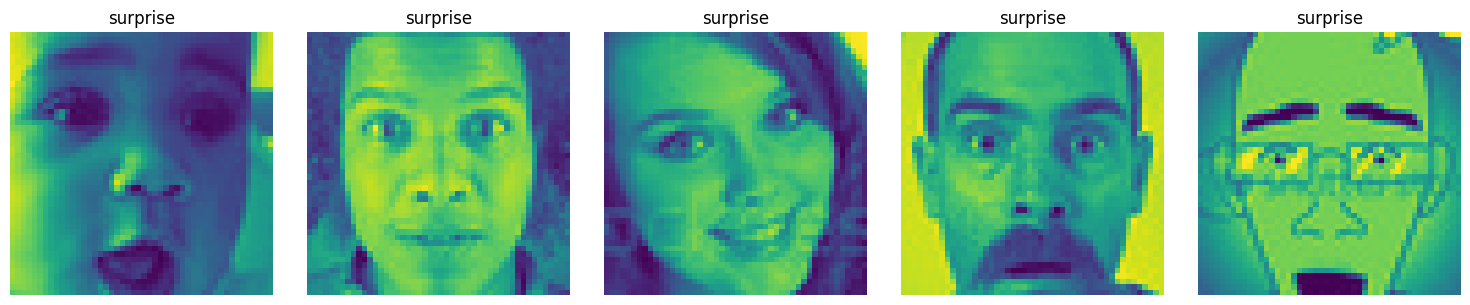

****************************************************************************************************
5 random Images in the neutral folder out of 1216 total files


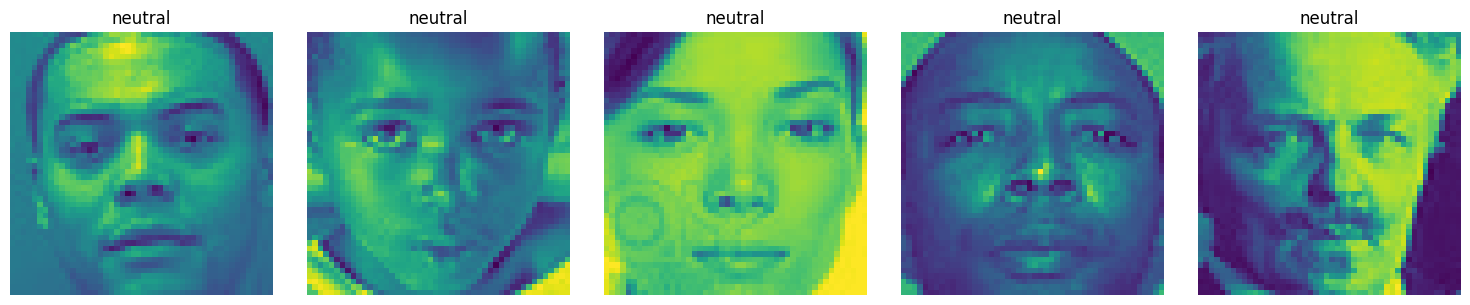

****************************************************************************************************
5 random Images in the fear folder out of 1018 total files


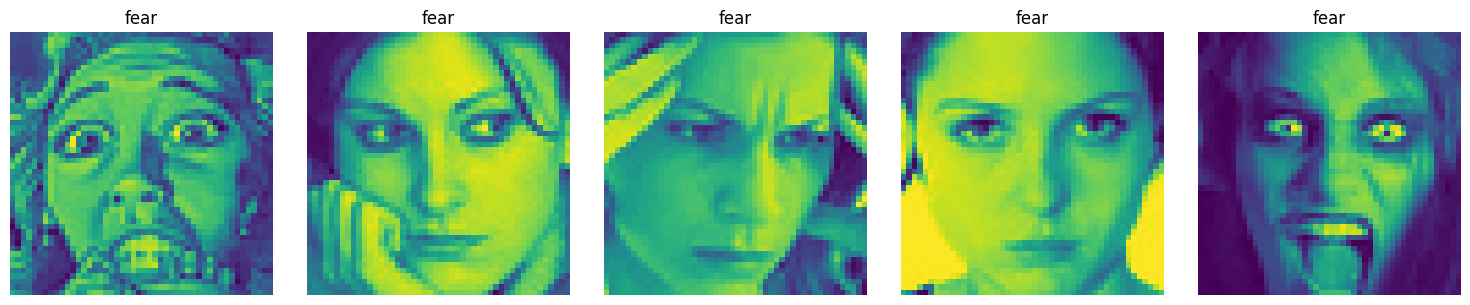

****************************************************************************************************
5 random Images in the disgust folder out of 111 total files


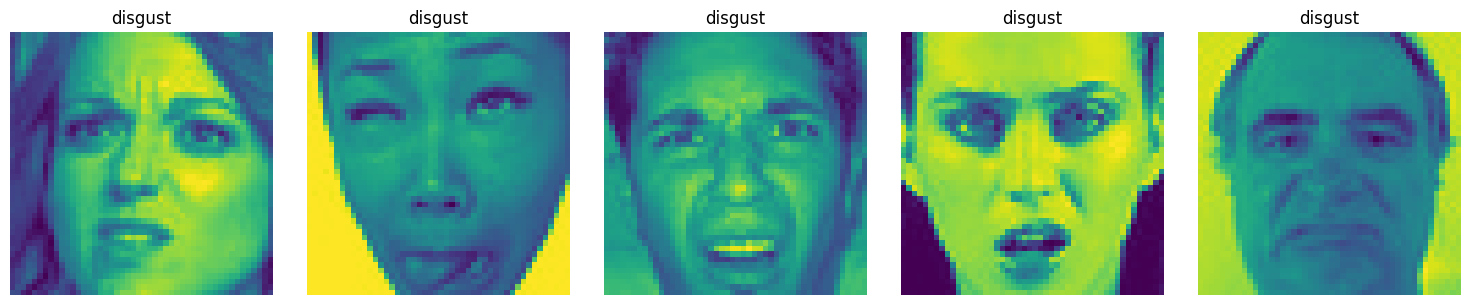

****************************************************************************************************
5 random Images in the sad folder out of 1139 total files


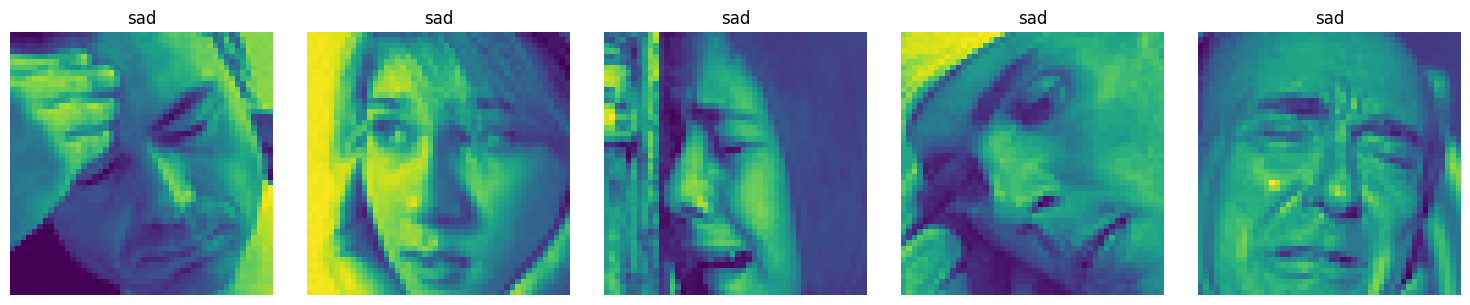

****************************************************************************************************
5 random Images in the angry folder out of 960 total files


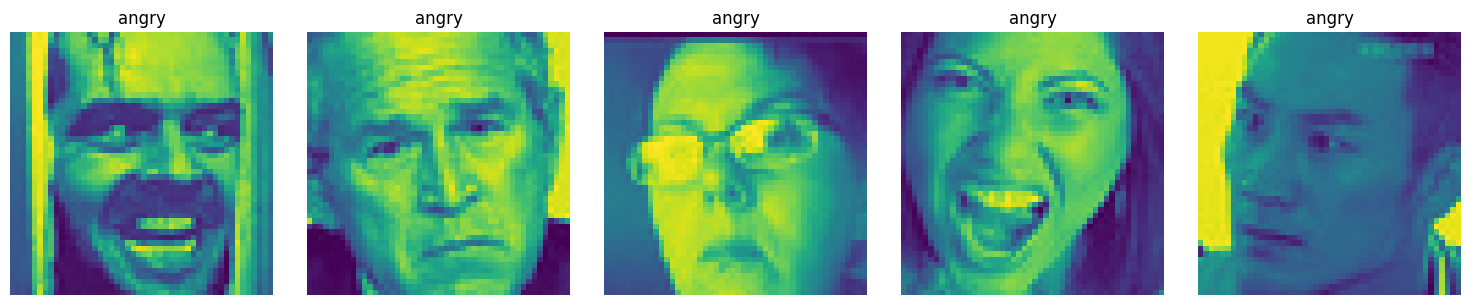

****************************************************************************************************


In [12]:
# Validation Dataset First Look
val_path = 'original_images/validation'
val_classes = os.listdir(val_path)

for class_name in val_classes:
    class_dir = os.path.join(val_path, class_name)
    images_files = os.listdir(class_dir)

    print(f"5 random Images in the {class_name} folder out of {len(images_files)} total files")

    random_images = random.sample(images_files, min(5, len(images_files)))

    plt.figure(figsize = (15, 3))
    for index, images in enumerate(random_images):
        img_path = os.path.join(class_dir, images)
        img = Image.open(img_path)
        
        plt.subplot(1, 5, index+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("*"*100)

### Images Count

In [13]:
main_dir = 'original_images'
main_dir_files = os.listdir(main_dir)
for sub_dir in main_dir_files:
    class_dir = os.path.join(main_dir, sub_dir)
    class_dir_files = os.listdir(class_dir)
    print("-"*90)
    print(f"Folder inside {sub_dir}: {class_dir_files}")
    print(f"Total Classes in the {sub_dir} folder is: {len(class_dir_files)}")

    total_images = 0
    for files in class_dir_files:
        files_dir  =  os.path.join(class_dir, files)
        images_count = len(os.listdir(files_dir))
        total_images+=images_count
        print(f"Count of images inside {files} : {images_count}")
    print()
    print(f"Total images in {sub_dir} Folder : {total_images}")    
    print()

------------------------------------------------------------------------------------------
Folder inside train: ['happy', 'surprise', 'neutral', 'fear', 'disgust', 'sad', 'angry']
Total Classes in the train folder is: 7
Count of images inside happy : 7164
Count of images inside surprise : 3205
Count of images inside neutral : 4982
Count of images inside fear : 4103
Count of images inside disgust : 436
Count of images inside sad : 4938
Count of images inside angry : 3993

Total images in train Folder : 28821

------------------------------------------------------------------------------------------
Folder inside validation: ['happy', 'surprise', 'neutral', 'fear', 'disgust', 'sad', 'angry']
Total Classes in the validation folder is: 7
Count of images inside happy : 1825
Count of images inside surprise : 797
Count of images inside neutral : 1216
Count of images inside fear : 1018
Count of images inside disgust : 111
Count of images inside sad : 1139
Count of images inside angry : 960

To

### Dataset Information

#### Duplicate Images

In [14]:
import os
import hashlib

def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file = f.read()
        hasher.update(file)
    return hasher.hexdigest() 

# Function to find duplicate images
def find_duplicates(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                if file_hash in hashes:
                    duplicates.append((file_path, hashes[file_hash]))
                else:
                    hashes[file_hash] = file_path  

            except Exception as e:
                print(f"Error: {e}")  

    return duplicates

dups = find_duplicates('original_images')
print(f"Total duplicate files found: {len(dups)}")

Total duplicate files found: 1853


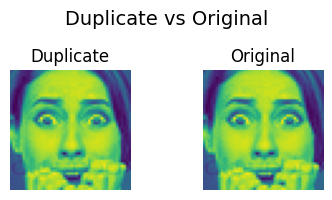

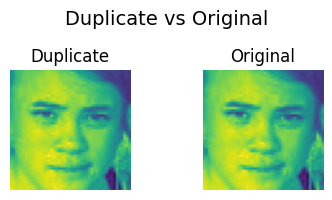

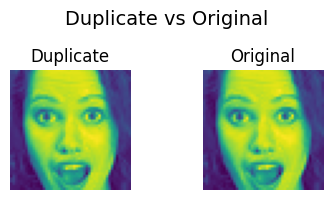

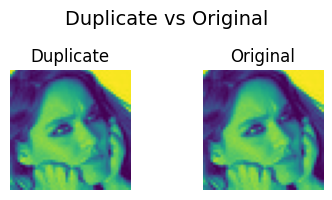

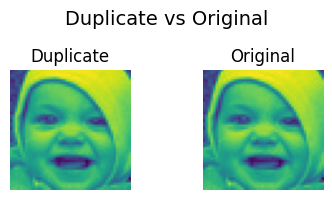

In [15]:
# Randomly sample up to 5 duplicate pairs
random_images = random.sample(dups, min(5, len(dups)))

for dup_path, original_path in random_images:
    try:
        dup_img = Image.open(dup_path)
        orig_img = Image.open(original_path)

        plt.figure(figsize=(4, 2))

        plt.subplot(1, 2, 1)
        plt.imshow(dup_img)
        plt.title("Duplicate")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(orig_img)
        plt.title("Original")
        plt.axis('off')

        plt.suptitle("Duplicate vs Original", fontsize=14)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not open images: {dup_path}, {original_path} → {e}")

In [16]:
import os
import hashlib

# Function to calculate the MD5 hash of a file
def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file_data = f.read()
        hasher.update(file_data)
    return hasher.hexdigest()

# Function to find duplicates across all folders and classes
def find_duplicates_with_classes(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                class_name = os.path.basename(os.path.dirname(file_path))

                if file_hash in hashes:
                    original_path = hashes[file_hash]['path']
                    original_class = hashes[file_hash]['class']
                    
                    duplicates.append({
                        'duplicate_path': file_path,
                        'duplicate_class': class_name,
                        'original_path': original_path,
                        'original_class': original_class
                    })
                else:
                    hashes[file_hash] = {'path': file_path, 'class': class_name}

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return duplicates


duplicates = find_duplicates_with_classes('original_images')

# Print results
print(f"Total duplicate files found: {len(duplicates)}\n")

duplicates_different_classes = 0
for dup in duplicates:
    if dup['duplicate_class'] != dup['original_class']:
        duplicates_different_classes+=1
        print(f"Duplicate Image : {dup['duplicate_path']} (Class: {dup['duplicate_class']})")
        print(f"Original Image  : {dup['original_path']} (Class: {dup['original_class']})")
print()
print("-"*90)
print("Total Number of duplicates with different classes :", duplicates_different_classes)

Total duplicate files found: 1853

Duplicate Image : original_images/train/surprise/14918.jpg (Class: surprise)
Original Image  : original_images/train/happy/34052.jpg (Class: happy)
Duplicate Image : original_images/train/surprise/4436.jpg (Class: surprise)
Original Image  : original_images/train/happy/34052.jpg (Class: happy)
Duplicate Image : original_images/train/surprise/28837.jpg (Class: surprise)
Original Image  : original_images/train/happy/35132.jpg (Class: happy)
Duplicate Image : original_images/train/surprise/13988.jpg (Class: surprise)
Original Image  : original_images/train/happy/7629.jpg (Class: happy)
Duplicate Image : original_images/train/surprise/34012.jpg (Class: surprise)
Original Image  : original_images/train/happy/25285.jpg (Class: happy)
Duplicate Image : original_images/train/surprise/16921.jpg (Class: surprise)
Original Image  : original_images/train/happy/4556.jpg (Class: happy)
Duplicate Image : original_images/train/neutral/22927.jpg (Class: neutral)
Origi

#### Corrupt Images

In [17]:
# Missing Values/Null Values Count
from PIL import Image

def check_missing_or_corrupt_images(directory):
    corrupt_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                img.verify()  
            except:
                corrupt_images.append(path)

    print(f"Corrupt or Unreadable Images: {len(corrupt_images)}")
    return corrupt_images

# Check both train and validation sets
corrupt_train = check_missing_or_corrupt_images(train_data_dir)
corrupt_val = check_missing_or_corrupt_images(validation_data_dir)


Corrupt or Unreadable Images: 0
Corrupt or Unreadable Images: 0


### What did you know about your dataset?

# Dataset Summary and Analysis

## Dataset Structure
The dataset is organized into two main folders:
- **Train**
- **Validation**

Inside each folder, there are **7 class folders**, representing the emotion categories:
- `happy`
- `surprise`
- `neutral`
- `fear`
- `disgust`
- `sad`
- `angry`

---

## Image Distribution

| Folder        | Class     | Image Count |
|----------------|-----------|--------------|
| **Train**      | Happy     | 7164         |
|                | Surprise  | 3205         |
|                | Neutral   | 4982         |
|                | Fear      | 4103         |
|                | Disgust   | 436          |
|                | Sad       | 4938         |
|                | Angry     | 3993         |
| **Total Train**|           | **28821**    |
|----------------|-----------|--------------|
| **Validation** | Happy     | 1825         |
|                | Surprise  | 797          |
|                | Neutral   | 1216         |
|                | Fear      | 1018         |
|                | Disgust   | 111          |
|                | Sad       | 1139         |
|                | Angry     | 960          |
| **Total Val**  |           | **7066**     |

---

## Duplicate Image Analysis
- **Total Duplicate Files Found:** **1853**
- **Duplicates Found Across Different Classes:** **80**

> Some images are shared between different emotion categories, which can cause label confusion if not handled properly.

---

## Corrupted Files Check
- **Corrupt or Unreadable Images:** **0**

> The dataset has no corrupted or unreadable images.

---

## Key Observations
- The dataset is **imbalanced**, with the **'Disgust'** class having very few images compared to other classes.
- A significant number of **duplicate images (1853)** were found.
- **80 cross-class duplicates** were detected, meaning the same image is labeled under different emotion categories.
- No corrupted images were found, so the dataset is clean in that regard.

---

## Recommended Next Steps
- **Remove duplicate images**, especially those across different classes.
- **Apply data augmentation** to underrepresented classes like `disgust` and `surprise` to balance the dataset.
- Proceed with preprocessing steps like **resizing, normalization**, and then move to **model building**.

---


## 3. ***Data Wrangling***

### Data Wrangling Code

##### Removing the duplicate images from the preprocessed folder which is the copy of the original images folder. It is done to ensure that the initial set of images remain untouched.

In [18]:
import os
import hashlib

def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file = f.read()
        hasher.update(file)
    return hasher.hexdigest() 

# Function to find duplicate images
def find_duplicates(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                if file_hash in hashes:
                    duplicates.append((file_path, hashes[file_hash]))
                else:
                    hashes[file_hash] = file_path  

            except Exception as e:
                print(f"Error: {e}")  

    return duplicates

dups = find_duplicates('preprocessed_images')
print(f"Total duplicate files found: {len(dups)}")

Total duplicate files found: 0


In [19]:
# ✅ Delete duplicates
for dup in dups:
    duplicate_file = dup[0]

    if os.path.exists(duplicate_file):
        try:
            os.remove(duplicate_file)
            print(f"✅ Deleted: {duplicate_file}")

        except Exception as e:
            print(f"Error deleting {duplicate_file}: {e}")

    else:
        print(f"File already deleted or not found: {duplicate_file}")

print("\n✅ All duplicate images deletion check completed!")



✅ All duplicate images deletion check completed!


##### Comparison before and after deleting the images

In [26]:
import os
import pandas as pd

data = []

def count_images(main_dir, phase):
    main_dir_files = os.listdir(main_dir)
    for sub_dir in main_dir_files:
        class_dir = os.path.join(main_dir, sub_dir)
        class_dir_files = os.listdir(class_dir)

        total_images_in_folder = 0

        for files in class_dir_files:
            files_dir = os.path.join(class_dir, files)
            images_count = len(os.listdir(files_dir))

            total_images_in_folder += images_count

            data.append({
                'Main Folder': sub_dir,
                'Class': files,
                'Images Count': images_count,
                'Phase': phase
            })

        # ✅ Append total count for the folder
        data.append({
            'Main Folder': sub_dir,
            'Class': 'Total',
            'Images Count': total_images_in_folder,
            'Phase': phase
        })

count_images('original_images', 'Before')
count_images('preprocessed_images', 'After')

df = pd.DataFrame(data)
comparison_df = df.pivot_table(index=['Main Folder', 'Class'],
                               columns='Phase',
                               values='Images Count',
                               fill_value=0).reset_index()
comparison_df



Phase,Main Folder,Class,After,Before
0,train,Total,27560.0,28821.0
1,train,angry,3825.0,3993.0
2,train,disgust,377.0,436.0
3,train,fear,3907.0,4103.0
4,train,happy,7048.0,7164.0
5,train,neutral,4873.0,4982.0
6,train,sad,4838.0,4938.0
7,train,surprise,2692.0,3205.0
8,validation,Total,6474.0,7066.0
9,validation,angry,893.0,960.0


##### Unique data type of files found inside the folder

In [27]:
# checking the unique file formats i have in these folders
def check_unique_file_formats(folder_path):
    extensions = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_extension = os.path.splitext(file)[1]
            if file_extension not in extensions:
                extensions.append(file_extension)
        print(f"Unique files in {root}: {extensions}")
        print("-"*80)

folder_path = 'original_images'
check_unique_file_formats(folder_path)

Unique files in original_images: []
--------------------------------------------------------------------------------
Unique files in original_images/train: []
--------------------------------------------------------------------------------
Unique files in original_images/train/happy: ['.jpg']
--------------------------------------------------------------------------------
Unique files in original_images/train/surprise: ['.jpg']
--------------------------------------------------------------------------------
Unique files in original_images/train/neutral: ['.jpg']
--------------------------------------------------------------------------------
Unique files in original_images/train/fear: ['.jpg']
--------------------------------------------------------------------------------
Unique files in original_images/train/disgust: ['.jpg']
--------------------------------------------------------------------------------
Unique files in original_images/train/sad: ['.jpg']
---------------------------

##### Unique Images pixel found inside every folder

In [28]:
# checking the unique images size 
def check_image_size(folder_path):
    size = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            image_path = os.path.join(root, file)
            with Image.open(image_path) as img:
                image_size = img.size
            if image_size not in size:
                size.append(image_size)
                
        print(f"Unique image size in {root}: {size}")
        print("-"*80)
        
folder_path = 'original_images'
check_image_size(folder_path)

Unique image size in original_images: []
--------------------------------------------------------------------------------
Unique image size in original_images/train: []
--------------------------------------------------------------------------------
Unique image size in original_images/train/happy: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in original_images/train/surprise: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in original_images/train/neutral: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in original_images/train/fear: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in original_images/train/disgust: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in original_imag

##### Unique type of Image file size found inside different folder

In [29]:
# Set your directory path
base_path = "original_images"

file_data = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            size_kb = os.path.getsize(file_path) / 1024  
            file_data.append({
                "file_name": file,
                "folder": os.path.relpath(root, base_path),
                "size_kb": round(size_kb, 2)
            })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Create DataFrame
df = pd.DataFrame(file_data)

# Sort by size to detect anomalies
df_sorted = df.sort_values(by="size_kb", ascending=False)
df_sorted

,file_name,folder,size_kb
18839,35080.jpg,train/fear,2.42
18560,22277.jpg,train/fear,2.34
16135,32795.jpg,train/fear,2.34
25840,34623.jpg,train/angry,2.31
27916,10490.jpg,train/angry,2.31
...,...,...,...
1457,7629.jpg,train/happy,0.35
9241,13988.jpg,train/surprise,0.35
25460,15894.jpg,train/angry,0.35
12251,22927.jpg,train/neutral,0.35


In [30]:
print("Unique File Sizes (KB):")
print(df["size_kb"].unique())
print("Total Files Scanned:", len(df))


Unique File Sizes (KB):
[1.71 1.55 1.69 1.63 1.58 1.61 1.59 1.53 1.51 1.54 1.47 1.7  1.52 1.65
 1.67 1.14 1.32 1.4  1.6  1.73 1.33 1.36 1.44 1.38 1.45 1.19 1.64 1.39
 1.68 1.43 1.57 1.82 1.85 1.21 1.46 1.74 1.62 1.42 1.49 1.66 1.41 1.29
 1.5  1.27 1.35 1.3  1.26 1.83 1.23 1.72 1.91 1.31 1.56 1.48 1.78 1.84
 1.37 1.77 1.88 1.75 1.34 1.22 1.12 1.28 1.76 1.81 1.24 1.25 1.18 1.79
 2.05 1.8  1.96 1.2  1.89 1.97 2.14 1.86 1.95 2.2  1.13 0.6  0.81 1.17
 2.18 1.92 1.1  0.35 1.16 1.87 2.   0.9  1.07 2.24 1.03 1.94 1.9  1.93
 1.15 1.09 0.87 2.03 1.98 1.02 1.11 2.01 2.28 0.91 2.17 0.77 1.   1.99
 1.06 0.85 0.95 0.98 2.19 1.04 2.25 2.09 1.01 0.94 2.26 2.11 0.92 0.66
 2.13 0.88 0.96 2.08 1.08 0.45 1.05 2.07 0.82 2.02 2.04 2.12 2.34 2.06
 2.16 0.97 2.21 0.55 0.84 2.42 0.93 2.1  0.99 0.71 2.31 2.23 0.68 2.22
 2.15 0.54]
Total Files Scanned: 35887


##### Algorithm to detect if there are actual faces in the images or not 

In [32]:
from facenet_pytorch import MTCNN
from PIL import Image
import os
from tqdm import tqdm

# ✅ Initialize MTCNN face detector
mtcnn = MTCNN(keep_all=True)
folder_path = 'original_images'
no_face_images = []

for root, dirs, files in os.walk(folder_path):
    for file in tqdm(files):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)

            try:      
                img = Image.open(file_path).convert('RGB')           
                boxes, _ = mtcnn.detect(img)             
                if boxes is None:
                    no_face_images.append(file_path)

            except Exception as e:
                print(f"⚠️ Error processing {file_path}: {e}")
                no_face_images.append(file_path)

if len(no_face_images) == 0:
    print("✅ All images have faces.")
else:
    print(f"Found {len(no_face_images)} images with NO faces:")

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████| 3993/3993 [00:50<00:00, 78.84it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 960/960 [00:13<00:00, 71.33it/s]

Found 5728 images with NO faces:


In [33]:
# Save
pd.DataFrame(no_face_images, columns=['FilePath']).to_csv('no_face_images.csv', index=False)

In [35]:
# Load
no_face_images = pd.read_csv('no_face_images.csv')
no_face_images.head()

,FilePath
0,original_images/train/happy/21251.jpg
1,original_images/train/happy/18985.jpg
2,original_images/train/happy/32886.jpg
3,original_images/train/happy/3361.jpg
4,original_images/train/happy/14952.jpg


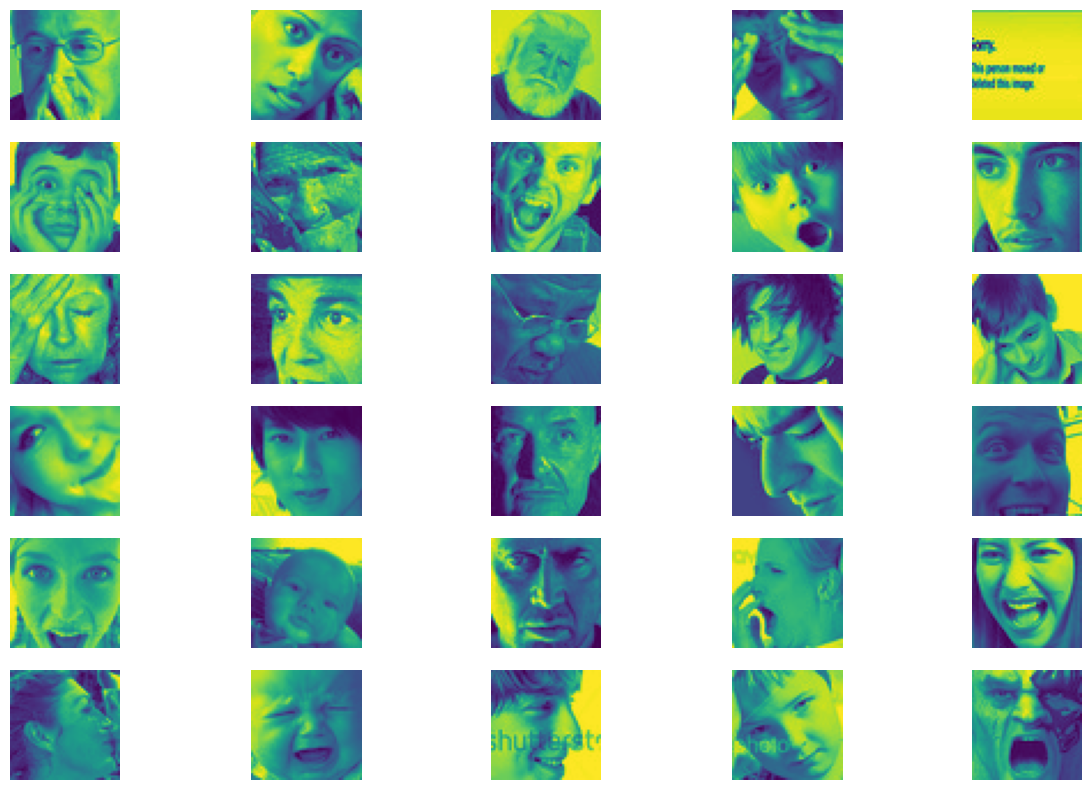

In [42]:
no_face_images_list = no_face_images['FilePath'].tolist()
random30 = random.sample(no_face_images_list, min(30, len(no_face_images_list)))
plt.figure(figsize=(15,10))
for index, file_path in enumerate(random30):
    plt.subplot(6, 5, index+1)
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis("off")
plt.show()

# Face Detection Observation Using MTCNN

## Method Applied:
- Used **MTCNN (Multi-task Cascaded Convolutional Neural Networks)** algorithm for face detection on the dataset.

## Observation:
- **Total images with no detected face:** **5728**
- On reviewing, it was observed that:
  - A **majority of these images actually contain faces**, but MTCNN failed to detect them due to:
    - Partial faces
    - Different angles
    - Occluded or cropped faces
    - Low-resolution or side-profile faces
  - **Some images are indeed not faces**, for example, as shown in the visualization above (e.g., an image containing text).

## Issue Highlighted:
- If the CNN model is trained with images where:
  - Faces are not properly detected
  - Some images are irrelevant (non-face)
- This will lead to a model with **poor accuracy and bad generalization**, as the network will try to learn from incorrect or noisy data.

## Limitation Faced:
- The dataset is **very large**, and **manual cleaning is not feasible**.
- Face detection algorithms like MTCNN also have limitations when handling:
  - Side faces
  - Low contrast
  - Occlusions

## Conclusion:
- This issue highlights that **dataset quality plays a crucial role in deep learning performance**.
- Although face detection-based filtering is helpful, it is **not 100% reliable**.
- In real-world scenarios, dealing with noisy data is a common challenge, and models should be made robust to handle such imperfections.



### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

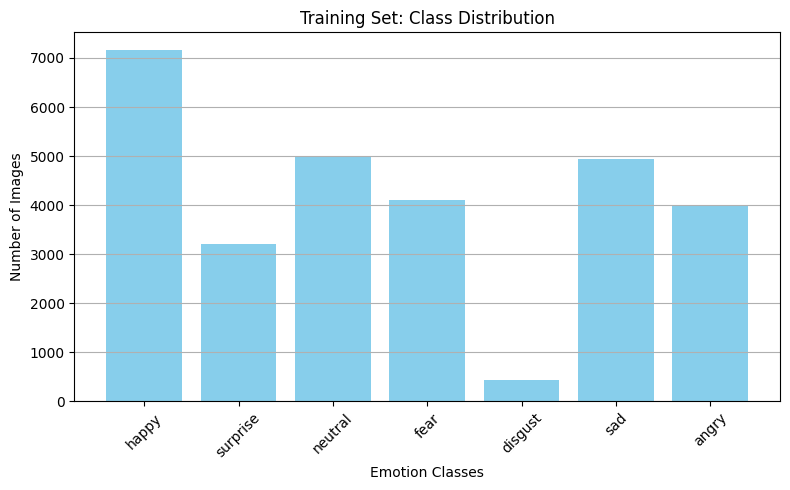

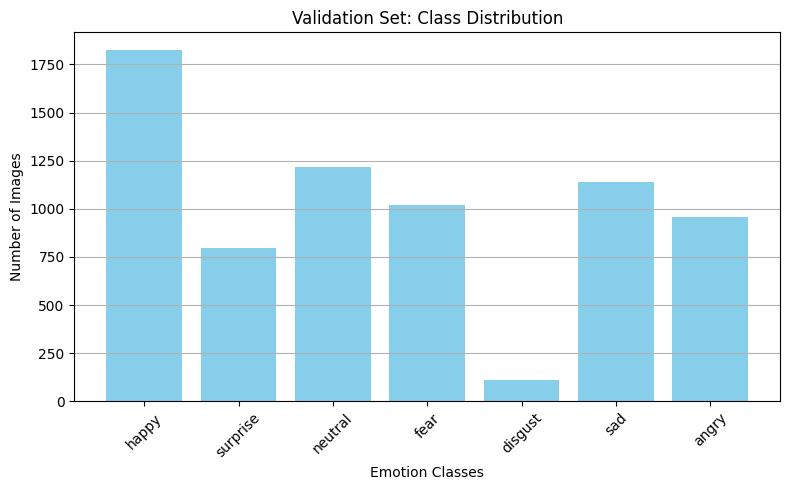

In [46]:
# Chart - 1 visualization code
def plot_class_distribution(directory, title):
    classes = os.listdir(directory)
    counts = [len(os.listdir(os.path.join(directory, cls))) for cls in classes]

    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Emotion Classes')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_data_dir, 'Training Set: Class Distribution')
plot_class_distribution(validation_data_dir, 'Validation Set: Class Distribution')


##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***Deep Learning Model Implementation***

### Deep Learning Model - 1

In [13]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                     Dropout, BatchNormalization, Rescaling,
                                     RandomFlip, RandomRotation, RandomZoom)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [14]:
# importing libraries for building the model
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/validation'
model_save_path = 'cnn_custom_first_model.keras'

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
IMG_SIZE = (48, 48)
BATCH_SIZE = 128
EPOCHS = 100

In [5]:
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/validation'
model_save_path = 'cnn_custom_first_model.keras'

In [6]:
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
IMG_SIZE = (48, 48)
BATCH_SIZE = 128
EPOCHS = 100

In [15]:
# ✅ Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ✅ Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

data_augmentation = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

Found 27560 files belonging to 7 classes.
Found 6474 files belonging to 7 classes.


In [16]:
model = Sequential([
    tf.keras.Input(shape=(48, 48, 1)),

    # ✅ Data Augmentation Layer
    data_augmentation,

    # ✅ Block 1
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Block 2
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Block 3
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Fully Connected Layer
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # ✅ Output Layer
    Dense(7, activation='softmax', dtype='float32')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,04

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        patience=10, 
        monitor='val_loss', 
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/100


E0000 00:00:1751091580.660938     837 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_4_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1751091583.235399     943 cuda_dnn.cc:529] Loaded cuDNN version 90300


216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2193 - loss: 2.3822
Epoch 1: val_accuracy improved from -inf to 0.20019, saving model to cnn_custom_first_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 58s 202ms/step - accuracy: 0.2195 - loss: 2.3808 - val_accuracy: 0.2002 - val_loss: 1.9133
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.3511 - loss: 1.7163
Epoch 2: val_accuracy improved from 0.20019 to 0.24884, saving model to cnn_custom_first_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.3512 - loss: 1.7159 - val_accuracy: 0.2488 - val_loss: 1.9305
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4313 - loss: 1.4825
Epoch 3: val_accuracy improved from 0.24884 to 0.47390, saving model to cnn_custom_first_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.4314 - loss: 1.4823 - val_accuracy: 0.4739 - val_loss: 1.3964
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4838 - loss: 1.3

In [19]:
# ✅ Predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# ✅ Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━

2025-06-28 07:24:54.470858: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

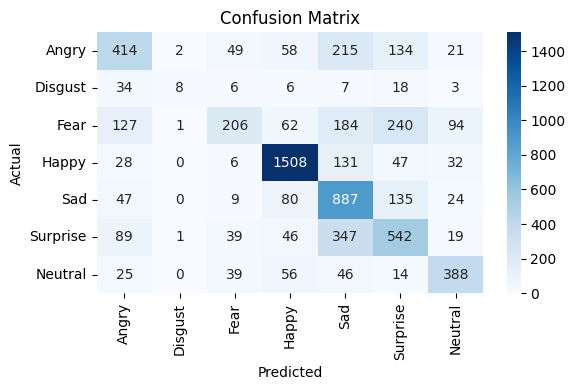

In [22]:
# Visualizing evaluation Metric Score chart
# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Deep Learning Model - 2

In [23]:
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/validation'
model_save_path = 'cnn_custom_second_model.keras'

# ✅ Class Labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ✅ Hyperparameters
IMG_SIZE = (48, 48)
BATCH_SIZE = 128
EPOCHS = 100

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ✅ Performance optimization with prefetching
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 27560 files belonging to 7 classes.
Found 6474 files belonging to 7 classes.


In [25]:
inputs = tf.keras.Input(shape=(48, 48, 1))

# ✅ Data Augmentation + Normalization
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.RandomFlip("horizontal")(x)
x = tf.keras.layers.RandomRotation(0.1)(x)
x = tf.keras.layers.RandomZoom(0.1)(x)

# ✅ Block 1
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# ✅ Block 2
x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# ✅ Block 3
x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# ✅ Classification Head
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

# ✅ Output Layer
outputs = tf.keras.layers.Dense(7, activation="softmax", dtype='float32')(x)

# ✅ Model
model = tf.keras.Model(inputs, outputs)

# ✅ Model Summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,992,839 (7.60 MB)

 Trainable params: 1,989,639 (7.59 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [26]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=model_save_path,
        monitor="val_accuracy",
        save_best_only=True,
        mode="max",
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/100


E0000 00:00:1751096266.426252     837 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.1889 - loss: 2.4155
Epoch 1: val_accuracy improved from -inf to 0.16728, saving model to cnn_custom_second_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 58s 225ms/step - accuracy: 0.1890 - loss: 2.4146 - val_accuracy: 0.1673 - val_loss: 2.1658 - learning_rate: 0.0010
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.2493 - loss: 1.9550
Epoch 2: val_accuracy improved from 0.16728 to 0.17578, saving model to cnn_custom_second_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 48s 217ms/step - accuracy: 0.2494 - loss: 1.9548 - val_accuracy: 0.1758 - val_loss: 1.9864 - learning_rate: 0.0010
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.3245 - loss: 1.7478
Epoch 3: val_accuracy improved from 0.17578 to 0.32885, saving model to cnn_custom_second_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 47s 216ms/step - accuracy: 0.3246 - loss: 1.7474 - val_accuracy: 0.3289 - val_loss: 1.6483 - learning_rate: 0.0010
Epoch 4/10

In [27]:
y_true, y_pred = [], []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# ✅ Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━

2025-06-28 12:28:54.982479: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

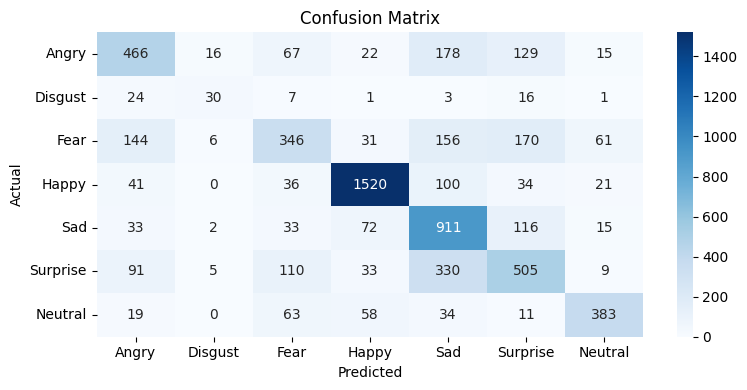

In [29]:
# Visualizing evaluation Metric Score chart
# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Deep Learning Model - 3

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_3 (RandomFlip)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_3 (RandomZoom)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,992,839 (7.60 MB)

 Trainable params: 1,989,639 (7.59 MB)

 Non-trainable params: 3,200 (12.50 KB)

Epoch 1/100


2025-06-28 12:34:41.606928: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1855 - loss: 2.4013
Epoch 1: val_accuracy improved from -inf to 0.26054, saving model to cnn_custom_third_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 96s 171ms/step - accuracy: 0.1856 - loss: 2.4008 - val_accuracy: 0.2605 - val_loss: 1.8386 - learning_rate: 0.0010
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.2590 - loss: 1.8648
Epoch 2: val_accuracy improved from 0.26054 to 0.32706, saving model to cnn_custom_third_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 74s 163ms/step - accuracy: 0.2591 - loss: 1.8647 - val_accuracy: 0.3271 - val_loss: 1.6838 - learning_rate: 0.0010
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.3843 - loss: 1.5751
Epoch 3: val_accuracy improved from 0.32706 to 0.46405, saving model to cnn_custom_third_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 76s 168ms/step - accuracy: 0.3844 - loss: 1.5750 - val_accuracy: 0.4641 - val_loss: 1.3972 - learning_rate: 0.0010
Epoch 4/100
4

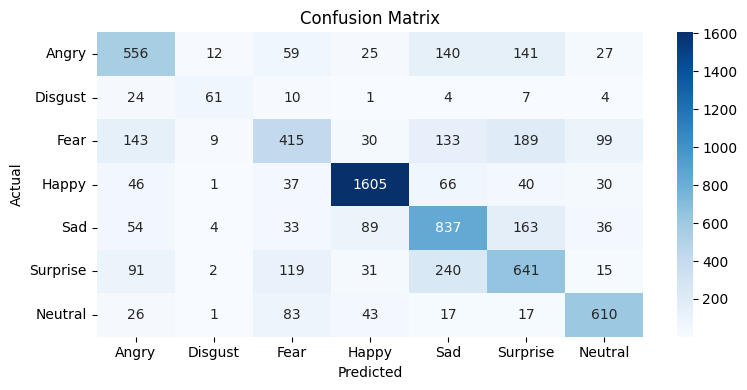

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

# Paths
train_dir = 'original_images/train'
val_dir = 'original_images/validation'
model_save_path = 'cnn_custom_third_model.keras'

# Class Names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Hyperparameters
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 100

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)


# MODEL ARCHITECTURE (With Augmentation Inside)

inputs = tf.keras.Input(shape=(48, 48, 1))

# Data Augmentation + Normalization (Only during training)
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.RandomFlip("horizontal")(x)
x = tf.keras.layers.RandomRotation(0.1)(x)
x = tf.keras.layers.RandomZoom(0.1)(x)

# CNN Layers
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Classification Head
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(7, activation="softmax", dtype='float32')(x)

model = tf.keras.Model(inputs, outputs)

model.summary()


# COMPILE MODEL
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# CALLBACKS
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=model_save_path,
        monitor="val_accuracy",
        save_best_only=True,
        mode="max",
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=15,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        verbose=1
    )
]


# TRAINING
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# EVALUATION
y_true, y_pred = [], []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# Classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

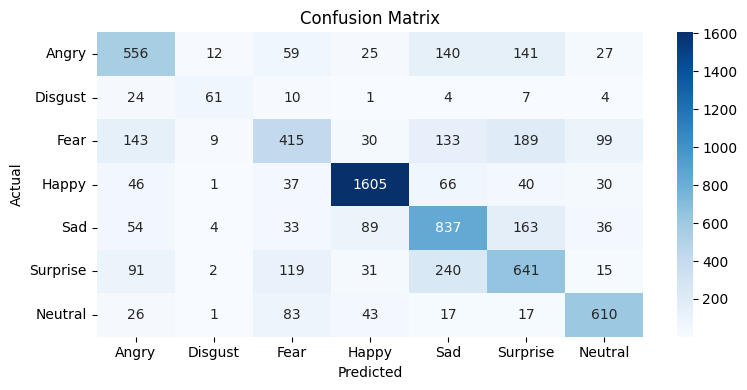

In [31]:
# Visualizing evaluation Metric Score chart
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Transfer Learning using EfficientNet algorithm

In [32]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, mixed_precision
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

train_dir = "preprocessed_images/train"
val_dir = "preprocessed_images/validation"

# Load grayscale datasets with small input size
train_ds = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale", 
    image_size=(48, 48),
    batch_size=32,
    shuffle=True
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=(48, 48),
    batch_size=32,
    shuffle=False
)

# Data Augmentation block
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Preprocessing function
def preprocess(image, label):
    image = tf.image.grayscale_to_rgb(image)  # Convert 1 channel → 3 channels
    image = tf.image.resize(image, (224, 224), method='bicubic')  # Best interpolation
    image = data_augmentation(image)  # Apply data augmentation
    image = preprocess_input(image)  
    return image, label


# Apply preprocessing
train_data = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_data = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# Optimize pipeline
train_data = train_data.prefetch(tf.data.AUTOTUNE)
val_data = val_data.prefetch(tf.data.AUTOTUNE)

# EffcientNet model
def create_model():
    base_model = EfficientNetB0(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base initially

    inputs = layers.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(7, activation='softmax', dtype='float32')(x)  # 7 classes

    model = models.Model(inputs, outputs)
    return model


model = create_model()
model.summary()

# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="Transfer_learning_efficientnet_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode="max",
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        verbose=1
    )
]

# Training the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=callbacks
)

Found 27560 files belonging to 7 classes.
Found 6474 files belonging to 7 classes.


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,380,330 (16.71 MB)

 Trainable params: 330,247 (1.26 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

Epoch 1/30


I0000 00:00:1751117233.284320     941 service.cc:152] XLA service 0x7fb2d401c2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751117233.286391     941 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-28 13:27:14.188466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751117259.820776     941 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3567 - loss: 1.8591

2025-06-28 13:29:28.407724: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2336', 248 bytes spill stores, 248 bytes spill loads

2025-06-28 13:29:54.027894: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2336', 268 bytes spill stores, 268 bytes spill loads

2025-06-28 13:29:56.350961: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng28{k2=4,k3=0} for conv %cudnn-conv.120 = (f16[10,112,112,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[10,112,112,32]{3,2,1,0} %bitcast.7520, f16[32,3,3,1]{3,2,1,0} %bitcast.7528), window={size=3x3 pad=1_1x1_1}, dim_labels=b01f_o01i->b01f, feature_group_count=32, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_6_1/efficientnetb0_1/block1a_dwconv_1/depthwi


Epoch 1: val_accuracy improved from -inf to 0.48965, saving model to Transfer_learning_efficientnet_model.keras
862/862 ━━━━━━━━━━━━━━━━━━━━ 191s 170ms/step - accuracy: 0.3568 - loss: 1.8588 - val_accuracy: 0.4897 - val_loss: 1.3926 - learning_rate: 0.0010
Epoch 2/30
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4556 - loss: 1.4315
Epoch 2: val_accuracy improved from 0.48965 to 0.50077, saving model to Transfer_learning_efficientnet_model.keras
862/862 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - accuracy: 0.4556 - loss: 1.4315 - val_accuracy: 0.5008 - val_loss: 1.3431 - learning_rate: 0.0010
Epoch 3/30
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4703 - loss: 1.3902
Epoch 3: val_accuracy improved from 0.50077 to 0.50463, saving model to Transfer_learning_efficientnet_model.keras
862/862 ━━━━━━━━━━━━━━━━━━━━ 93s 106ms/step - accuracy: 0.4703 - loss: 1.3902 - val_accuracy: 0.5046 - val_loss: 1.3372 - learning_rate: 0.0010
Epoch 4/30
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/st

KeyboardInterrupt: 

In [33]:
# Fine-Tuning Stage (Unfreeze Some Layers)
# Unfreeze base model
base_model = model.layers[1]  
base_model.trainable = True

# Optionally freeze first few layers to retain low-level features
for layer in base_model.layers[:200]:
    layer.trainable = False

# Re-compile with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

model.save("final_transfer_learning emotion_recognition_model.keras")


Epoch 1/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3622 - loss: 1.7950
Epoch 1: val_accuracy did not improve from 0.54572
862/862 ━━━━━━━━━━━━━━━━━━━━ 196s 164ms/step - accuracy: 0.3622 - loss: 1.7949 - val_accuracy: 0.4680 - val_loss: 1.4507 - learning_rate: 1.0000e-05
Epoch 2/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4431 - loss: 1.5075
Epoch 2: val_accuracy did not improve from 0.54572
862/862 ━━━━━━━━━━━━━━━━━━━━ 90s 103ms/step - accuracy: 0.4431 - loss: 1.5075 - val_accuracy: 0.4833 - val_loss: 1.3504 - learning_rate: 1.0000e-05
Epoch 3/20
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4648 - loss: 1.4465
Epoch 3: val_accuracy did not improve from 0.54572
862/862 ━━━━━━━━━━━━━━━━━━━━ 94s 108ms/step - accuracy: 0.4648 - loss: 1.4464 - val_accuracy: 0.5102 - val_loss: 1.3073 - learning_rate: 1.0000e-05
Epoch 4/20
862/862 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4856 - loss: 1.3947
Epoch 4: val_accuracy did not improve from 0.54572
86

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosed the model best_emotion_model.keras as final model beacuse its accuracy was 70 percent.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***